# 快速开始 NumPy｜了解 NumPy 的数组并实现常用的数组操作

<a href="https://bohrium.dp.tech/notebook/37bfb5fc36cf4c4e80e91caabc4a37d4" target="_blank"><img src="https://cdn.dp.tech/bohrium/web/static/images/open-in-bohrium.svg" alt="Open In Bohrium"/></a>

<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        ©️ <b><i>Copyright 2023 @ Authors</i></b><br/>
        <i>作者：<a href="mailto:hh@shao.ac.cn"><b>阙浩辉 📨 </b></a></i><br/>
        <i>日期：2023-05-09</i><br/>
        <i>共享协议：</a>本作品采用<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">知识共享署名-非商业性使用-相同方式共享 4.0 国际许可协议</a>进行许可。</i>
    </p>
</div>

🎯 <b style='color:purple'>本教程旨在<u>快速掌握</u> NumPy 数据结构并进行常见的数据处理操作。</b>

* 一键运行，你可以快速在实践中检验你的想法。

* 丰富完善的注释，对于入门者友好。

**在 [Bohrium Notebook](https://bohrium-doc.dp.tech/docs/userguide/Notebook) 界面，你可以点击界面上方蓝色按钮 `开始连接`，选择 `bohrium-notebook` 镜像及任何一款节点配置，稍等片刻即可运行。**

<div style="width:auto; height:2px; background:linear-gradient(244deg,rgba(0,0,0,0) 0%,rgba(0,0,0,0.5) 50%,rgba(0,0,0,1) 100%)"></div>

## 目标<a id ='0'></a>

阅读本教程后，你将能够：

* 了解 NumPy 中一维、二维和 n 维数组之间的区别;
* 了解如何将一些线性代数运算应用于 n 维数组，不使用 for 循环;
* 了解 n 维数组的轴和形状属性。

**阅读该教程【最多】约需 30 分钟，让我们开始吧！**

## 目录

![numpy](https://numpy.org/doc/stable/_static/numpylogo.svg)

* [背景](#background)
* [实践](#practice)
   * [1 基础知识](#1)
      * [1.1 数组创建](#1-1)
      * [1.2 打印数组](#1-2)
      * [1.3 基本运算操作](#1-3)
      * [1.4 索引、切片和迭代](#1-4)
   * [2 形状操控](#2)
      * [2.1 改变数组的形状](#2-1)
      * [2.2 不同数组的堆叠](#2-2)
      * [2.3 将一个数组分成几个小数组](#2-3)
      * [2.4 副本和视图](#2-4)
      * [2.5 广播规则](#2-5)
   * [3 进阶索引和索引技巧](#3)
      * [3.1 用索引数组进行索引](#3-1)
      * [3.2 布尔数组索引](#3-2)
      * [3.3 ix_()函数](#3-3)
   * [4 技巧和提示](#4)
      * [4.1 自动reshape](#4-1)
      * [4.2 矢量叠加](#4-2)
      * [4.3 柱状图](#4-3)
* [总结](#summary)
* [进一步阅读](#furtherreading)
* [参考](#references)

## 背景 <a id ='background'></a>

这是NumPy数组的快速概述。它演示了如何表示和操作n维数组。特别是，如果您不知道如何在n维数组上应用常见函数（而不使用for循环），或者想了解n维数组的轴和形状属性，本文可能会对您有所帮助。

**你需要提前掌握以下知识：**
- 非常基本的 Python 知识

## 实践 <a id='practice'></a>

## 1 基础知识<a id ='1'></a>
NumPy 的主要对象是齐次多维数组。这是一个所有类型相同，由非负整数元组索引的元素表（通常是数字）。在 NumPy 中，维度称为轴。
例如，3D 空间中点的坐标数组，有一个轴。该轴中有 3 个元素，所以我们说它的长度为 3。
在下图的示例中，数组有 2个轴。第一个轴的长度为 2，第二个轴的长度为 3 。

In [281]:
[[1., 0., 0.],
 [0., 1., 2.]]

[[1.0, 0.0, 0.0], [0.0, 1.0, 2.0]]

**重要的属性对象**

- ndarray.ndim  
数组的轴数（维度）。

- ndarray.shape  
数组的维度。这是一个指示每个维度中数组的大小的整数元组。对于包含 n 行和 m 列的矩阵，元组的长度是轴数。 **shape(n,m)shapendim**

- ndarray.size  
数组的元素总数。相当于shape中的元素的乘积（n* m）。

- ndarray.dtype  
描述数组中元素类型的对象。可以使用标准 Python 类型创建或指定 dtype。此外 NumPy提供了自己的类型。**numpy.int32**、**numpy.int16** 和 **numpy.float64** 就是一些例子。

- ndarray.itemsize  
数组中每个元素的大小（以字节为单位）。例如，一个 类型的元素数组有 8 个 （=64/8）， 而其中一个类型有 4 个 （=32/8）。

- ndarray.data  
包含数组实际元素的缓冲区。通常，我们不需要使用此属性，因为我们将使用索引工具访问数组中的元素。

**Example**

In [282]:
import numpy as np
a = np.arange(15).reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [283]:
a.shape

(3, 5)

In [284]:
a.ndim

2

In [285]:
a.dtype.name

'int64'

In [286]:
a.itemsize

8

In [287]:
type(a)

numpy.ndarray

In [288]:
b = np.array([6, 7, 8])
b

array([6, 7, 8])

In [289]:
type(b)

numpy.ndarray

### 1.1 数组创建<a id ='1-1'></a>
例如，可以使用该函数从常规的Python列表或元组创建数组。数组的类型最终是从序列中元素的类型推断出来的。

In [290]:
import numpy as np
a = np.array([2, 3, 4])
a

array([2, 3, 4])

In [291]:
a.dtype

dtype('int64')

In [292]:
b = np.array([1.2, 3.5, 5.1])
b.dtype

dtype('float64')

一个常见的错误是调用多个参数，而不是提供一个序列作为参数。

In [293]:
# 这是一个错误展示
# a = np.array(1, 2, 3, 4)   

In [294]:
a = np.array([1, 2, 3, 4]) 

数组将序列的序列转换为二维数组，将序列的序列的序列转换为三维数组，等等。

In [295]:
b = np.array([(1.5, 2, 3), (4, 5, 6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

数组的类型也可以在创建时显式指定:

In [296]:
c = np.array([[1, 2], [3, 4]], dtype=complex)
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

通常，数组的元素最初是未知的，但它的大小是已知的。因此，NumPy提供了几个函数来创建具有初始占位符内容的数组。这样可以最大限度地减少增长数组的必要性。

如以下例子可知，创建一个全是0的数组，创建一个全是1的数组，该函数创建的数组的初始内容是随机的，取决于内存的状态。一般情况下，创建的数组的dtype是默认的，但可以通过关键字参数指定。

In [297]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [298]:
np.ones((2, 3, 4), dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [299]:
np.empty((2, 3))

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

为了创建数字序列，NumPy提供了类似于Python内置的函数，但返回一个数组:

In [300]:
np.arange(10, 30, 5)

array([10, 15, 20, 25])

In [301]:
np.arange(0, 2, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

当与浮点参数一起使用时，由于有限的浮点精度，通常不可能预测得到的元素数量。出于这个原因，通常更好的方法是使用函数来接收我们想要的元素数量作为参数。

In [302]:
from numpy import pi
np.linspace(0, 2, 9)                   # 从0-2等间距取9个数

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [303]:
x = np.linspace(0, 2 * pi, 100)        # np.linspace(start,stop，num) 在start和stop间返回num个间隔均匀的样本
f = np.sin(x)

### 1.2 打印数组<a id ='1-2'></a>
当你打印一个数组时，NumPy以类似于嵌套列表的方式显示它，但使用以下布局:  
- 最后一个轴从左向右打印，

- 倒数第二张是从上到下打印的，

- 其余的也从上到下打印，每个切片与下一个切片之间用空行隔开。  

然后将一维数组打印为行，二维数组打印为矩阵，三维数组打印为矩阵列表。

In [304]:
a = np.arange(6)                    # 1d array
print(a)

[0 1 2 3 4 5]


In [305]:
b = np.arange(12).reshape(4, 3)     # 2d array
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [306]:
c = np.arange(24).reshape(2, 3, 4)  # 3d array
print(c)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


如果一个数组太大而无法打印，NumPy会自动跳过数组的中心部分，只打印边角:

In [307]:
print(np.arange(10000))

[   0    1    2 ... 9997 9998 9999]


In [308]:
print(np.arange(10000).reshape(100, 100)) 

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


要禁用此行为并强制NumPy打印整个数组，您可以使用:

In [309]:
# 执行以下操作会强制 NumPy 打印整个数组（不建议）
# import sys
# np.set_printoptions(threshold=sys.maxsize)  

### 1.3 基本运算操作<a id ='1-3'></a>

数组上的算术运算符应用于elementwise。创建一个新数组并填充结果。

In [310]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
b

array([0, 1, 2, 3])

In [311]:
c = a - b
c

array([20, 29, 38, 47])

In [312]:
b**2

array([0, 1, 4, 9])

In [313]:
10 * np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [314]:
a < 35

array([ True,  True, False, False])

与许多矩阵语言不同，乘积运算符在NumPy数组中按elementwise操作。矩阵乘积可以使用运算符或函数或方法**（* @ dot）**来执行:

In [315]:
A = np.array([[1, 1],
              [0, 1]])
B = np.array([[2, 0],
              [3, 4]])
A * B     # elementwise product

array([[2, 0],
       [0, 4]])

In [316]:
A @ B

array([[5, 4],
       [3, 4]])

In [317]:
A.dot(B)  

array([[5, 4],
       [3, 4]])

一些操作（+= *=）是用来修改现有数组而不是创建新数组的：

In [318]:
rg = np.random.default_rng(1)  # 创建一个默认随机数生成器
a = np.ones((2, 3), dtype=int)
b = rg.random((2, 3))
a *= 3
a

array([[3, 3, 3],
       [3, 3, 3]])

In [319]:
b += a
b

array([[3.51182162, 3.9504637 , 3.14415961],
       [3.94864945, 3.31183145, 3.42332645]])

当操作不同类型的数组时，最终数组的类型对应于更一般或更精确的数组(这种行为称为上强制转换)。

In [320]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0, pi, 3)
b.dtype.name

'float64'

In [321]:
c = a + b
c

array([1.        , 2.57079633, 4.14159265])

In [322]:
c.dtype.name

'float64'

In [323]:
d = np.exp(c * 1j)
d

array([ 0.54030231+0.84147098j, -0.84147098+0.54030231j,
       -0.54030231-0.84147098j])

In [324]:
d.dtype.name

'complex128'

许多一元操作，例如计算数组中所有元素的和:

In [325]:
a = rg.random((2, 3))
a

array([[0.82770259, 0.40919914, 0.54959369],
       [0.02755911, 0.75351311, 0.53814331]])

In [326]:
a.sum()

3.1057109529998157

In [327]:
a.min()

0.027559113243068367

In [328]:
a.max()

0.8277025938204418

默认情况下，这些操作应用于整个数组，就像它是一个数字列表一样，而不管其形状如何。但是，通过指定参数，可以沿数组的指定轴应用操作。

In [329]:
b = np.arange(12).reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [330]:
b.sum(axis=0)     # 列和

array([12, 15, 18, 21])

In [331]:
b.min(axis=1) # 每行最小值

array([0, 4, 8])

In [332]:
b.cumsum(axis=1)# 每行累计和

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]])

### 通用函数
NumPy提供了熟悉的数学函数，如sin、cos和exp。在NumPy中，这些函数被称为“通用函数”。在NumPy中，这些函数对数组进行elementwise操作，输出生成一个数组。

In [333]:
B = np.arange(3)
B

array([0, 1, 2])

In [334]:
np.exp(B)

array([1.        , 2.71828183, 7.3890561 ])

In [335]:
np.sqrt(B)

array([0.        , 1.        , 1.41421356])

In [336]:
C = np.array([2., -1., 4.])
np.add(B, C)

array([2., 0., 6.])

### 1.4 索引、切片和迭代<a id ='1-4'></a>

一维数组可以被索引、切片和迭代，就像列表和其他Python序列一样。

In [337]:
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [338]:
a[2]

8

In [339]:
a[2:5]

array([ 8, 27, 64])

In [340]:
a[:6:2] = 1000
a

array([1000,    1, 1000,   27, 1000,  125,  216,  343,  512,  729])

In [341]:
a[::-1]  # reversed a

array([ 729,  512,  343,  216,  125, 1000,   27, 1000,    1, 1000])

In [342]:
for i in a:
    print(i**(1 / 3.))

9.999999999999998
1.0
9.999999999999998
3.0
9.999999999999998
4.999999999999999
5.999999999999999
6.999999999999999
7.999999999999999
8.999999999999998


多维数组每个轴可以有一个索引。这些索引以逗号分隔的元组给出:

In [343]:
def f(x, y):
    return 10 * x + y
b = np.fromfunction(f, (5, 4), dtype=int)
b

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [344]:
b[2, 3]

23

In [345]:
b[0:5, 1]  # 第二列中的所有元素

array([ 1, 11, 21, 31, 41])

In [346]:
b[:, 1]    # 前面指令的简化

array([ 1, 11, 21, 31, 41])

In [347]:
b[1:3, :]  # 1，2行中所有元素

array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

当提供的索引少于轴的数量时，缺失的索引被认为是完整的切片。

In [348]:
b[-1]   # 最后一行.等价于b[-1, :]

array([40, 41, 42, 43])

In [349]:
b[:,-1]

array([ 3, 13, 23, 33, 43])

- [1, 2, ...] is equivalent to ,x[1, 2, :, :, :]

- x[..., 3] to andx[:, :, :, :, 3]

- x[4, ..., 5, :] to .x[4, :, :, 5, :]

In [350]:
c = np.array([[[  0,  1,  2],  # 2个二维数组堆叠的三维数组
               [ 10, 12, 13]],
              [[100, 101, 102],
               [110, 112, 113]]])
c.shape

(2, 2, 3)

In [351]:
c[1, ...]  # same as c[1, :, :] or c[1]

array([[100, 101, 102],
       [110, 112, 113]])

In [352]:
c[..., 2]  # same as c[:, :, 2]

array([[  2,  13],
       [102, 113]])

在多维数组上的迭代是根据第一个轴完成的:

In [353]:
for row in b:
    print(row)

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


但是，如果想对数组中的每个元素执行操作，则可以使用flat属性，该属性是数组中所有元素的迭代器。

In [354]:
for e in b.flat:
    print(e)


0
1
2
3
10
11
12
13
20
21
22
23
30
31
32
33
40
41
42
43


## 2 形状操控<a id ='2'></a>


### 2.1 改变数组的形状<a id ='2-1'></a>

数组的形状由每个轴上的元素数量给出:

In [355]:
a = np.floor(10 * rg.random((3, 4)))
a

array([[3., 7., 3., 4.],
       [1., 4., 2., 2.],
       [7., 2., 4., 9.]])

In [356]:
a.shape

(3, 4)

数组的形状可以用各种指令改变。注意，**以下三个指令都返回一个修改后的数组，但不改变原始数组**:

In [357]:
a.ravel()  # 将多维数组拉成一维数组

array([3., 7., 3., 4., 1., 4., 2., 2., 7., 2., 4., 9.])

In [358]:
a.reshape(6, 2)  # 修改成指定格式的数组

array([[3., 7.],
       [3., 4.],
       [1., 4.],
       [2., 2.],
       [7., 2.],
       [4., 9.]])

In [359]:
a.T  # 矩阵转置

array([[3., 1., 7.],
       [7., 4., 2.],
       [3., 2., 4.],
       [4., 2., 9.]])

In [360]:
a.T.shape

(4, 3)

In [361]:
a.shape

(3, 4)

生成的数组中元素的顺序通常为“c-style”，即最右边的索引“变化最快”。如果数组被重新塑造为其他形状，该数组同样被视为“c-style”。NumPy通常按此顺序创建数组，因此通常不需要复制其参数，但如果该数组是通过获取另一个数组的切片创建的，或者使用不寻常的选项创建的，则可能需要复制它。还可以使用可选参数指示函数和使用fortran-style的数组，这种方式最左边的索引变化最快。

**而ndarray.resize指令会改变原来的数组**

In [362]:
a

array([[3., 7., 3., 4.],
       [1., 4., 2., 2.],
       [7., 2., 4., 9.]])

In [363]:
a.shape

(3, 4)

In [364]:
a.resize((2, 6))
a

array([[3., 7., 3., 4., 1., 4.],
       [2., 2., 7., 2., 4., 9.]])

In [365]:
a.shape

(2, 6)

如果在reshape操作中给出一个有效的维度，则自动计算其他维度。

In [366]:
a.reshape(3,-1)

array([[3., 7., 3., 4.],
       [1., 4., 2., 2.],
       [7., 2., 4., 9.]])

### 2.2 不同数组的堆叠<a id ='2-2'></a>
几个数组可以沿着不同的轴堆叠在一起:

In [367]:
a = np.floor(10 * rg.random((2, 2)))
a

array([[9., 7.],
       [5., 2.]])

In [368]:
b = np.floor(10 * rg.random((2, 2)))
b

array([[1., 9.],
       [5., 1.]])

In [369]:
np.vstack((a, b)) #行叠加

array([[9., 7.],
       [5., 2.],
       [1., 9.],
       [5., 1.]])

In [370]:
np.hstack((a, b)) #列叠加

array([[9., 7., 1., 9.],
       [5., 2., 5., 1.]])

函数**column_stack**将一维数组作为列堆叠到二维数组中。对二维数组来说等效于hstack：

In [371]:
from numpy import newaxis
np.column_stack((a, b))  

array([[9., 7., 1., 9.],
       [5., 2., 5., 1.]])

In [372]:
a = np.array([4., 2.])
b = np.array([3., 8.])
np.column_stack((a, b))  # 输出一个二维数组

array([[4., 3.],
       [2., 8.]])

In [373]:
np.hstack((a, b))        

array([4., 2., 3., 8.])

In [374]:
a[:, newaxis]  # 把a看成二维数组

array([[4.],
       [2.]])

In [375]:
np.column_stack((a[:, newaxis], b[:, newaxis]))

array([[4., 3.],
       [2., 8.]])

In [376]:
np.hstack((a[:, newaxis], b[:, newaxis]))  

array([[4., 3.],
       [2., 8.]])

另一方面，对于任何输入数组，函数row_stack等价于vstack。实际上，row_stack是vstack的别名:

In [377]:
np.column_stack is np.hstack

False

In [378]:
np.row_stack is np.vstack

True

一般来说，对于二维以上的数组，hstack将沿着它们的第二个轴堆栈，vstack将沿着它们的第一个轴堆栈，concatenate允许一个可选参数，给出应该发生连接的轴的编号。
**注意**
在复杂的情况下，r_和c_用于沿一个轴堆叠数字来创建数组。它们允许使用范围字面值。

In [379]:
np.r_[1:4, 0, 4]

array([1, 2, 3, 0, 4])

当使用数组作为参数时，r_和c_在默认行为中类似于vstack和hstack，但是允许一个可选参数，给出要连接的轴的编号。

### 2.3 将一个数组分成几个小数组<a id ='2-3'></a>

使用hsplit，可以通过指定要返回的形状相同的数组的数量，或者指定应该在哪些列之后进行分割，从而沿其水平轴分割数组。

**numpy.split(ary, indices_or_sections, axis)**
- ary：被分割的数组
- indices_or_sections：如果是一个整数，就用该数平均切分，如果是一个数组，为沿轴切分的位置（左开右闭）
- axis：设置沿着哪个方向进行切分，默认为 0，横向切分，即水平方向。为 1 时，纵向切分，即竖直方向。

In [380]:
a = np.floor(10 * rg.random((2, 12)))
a

array([[6., 7., 6., 9., 0., 5., 4., 0., 6., 8., 5., 2.],
       [8., 5., 5., 7., 1., 8., 6., 7., 1., 8., 1., 0.]])

In [381]:
np.hsplit(a, 3) #将一个数组水平分割为多个子数组（按列）

[array([[6., 7., 6., 9.],
        [8., 5., 5., 7.]]),
 array([[0., 5., 4., 0.],
        [1., 8., 6., 7.]]),
 array([[6., 8., 5., 2.],
        [1., 8., 1., 0.]])]

In [382]:
np.hsplit(a, (3, 4))

[array([[6., 7., 6.],
        [8., 5., 5.]]),
 array([[9.],
        [7.]]),
 array([[0., 5., 4., 0., 6., 8., 5., 2.],
        [1., 8., 6., 7., 1., 8., 1., 0.]])]

vsplit(将一个数组垂直分割为多个子数组（按行）)沿着垂直轴进行分割，而array_split允许指定沿着哪个轴进行分割。

### 2.4 副本和视图<a id ='2-4'></a>
在操作和操作数组时，它们的数据有时会复制到一个新数组中，有时不会。对于初学者来说，这经常是一个困惑的来源。有三种情况:

- 1.not copy at all  
简单赋值不复制对象或其数据。

In [383]:
a = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]])
b = a            
b is a           # a 和 b同一个数组的两个不同命名

True

Python将可变对象作为引用传递，因此函数调用不会复制。

In [384]:
def f(x):
    print(id(x))
id(a)  

140312980200016

In [385]:
f(a)  

140312980200016


- 2.view or shallow copy  
不同的数组对象可以共享相同的数据。该方法创建一个新的数组对象，用于查看相同的数据.

In [386]:
c = a.view()
c is a

False

In [387]:
c.base is a            # c是a的一个视图

True

In [388]:
c.flags.owndata

False

In [389]:
c = c.reshape((2, 6))  # a的形状不会改变
a.shape

(3, 4)

In [390]:
c[0, 4] = 1234         # a的数据会改变
a

array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

切片数组也获得的是原数组的一个视图。

In [391]:
s = a[:, 1:3]
s[:] = 10  # s[:]是s的视图。 将1-3列（左闭右开）所有行的元素赋值为10


- deep copy  
该方法生成数组及其数据的完整副本。

In [392]:
d = a.copy()  # 生成新的数组和数据副本
d is a

False

In [393]:
d.base is a  # d 与a 不共享任何数据

False

In [394]:
d[0, 0] = 9999
a

array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

如果不再需要原始数组，有时应该在切片后调用。例如，假设是一个巨大的中间结果，最终结果只包含很小的一部分，在使用切片构造时应该做一个deep copy:

In [395]:
a = np.arange(int(1e8))
b = a[:100].copy()
del a  

### 2.5 广播规则<a id ='2-5'></a>
广播允许通用函数以一种有意义的方式处理不完全相同形状的输入。

广播的第一个规则是，如果所有输入数组的维数不相同，则将在较小数组的形状前重复加上“1”，直到所有数组的维数相同。

广播的第二条规则确保在特定维度上大小为1的数组的行为就像它们具有该维度上形状最大的数组的大小一样。假定数组元素的值在“broadcast”数组的维度上是相同的。

应用广播规则后，所有数组的大小必须匹配。

当运算中的 2 个数组的形状不同时，numpy 将自动触发广播机制。如：

In [396]:
import numpy as np 
 
a = np.array([[ 0, 0, 0],
           [10,10,10],
           [20,20,20],
           [30,30,30]])
b = np.array([0,1,2])
print(a + b)

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


## 3 进阶索引和索引技巧<a id ='3'></a>

NumPy提供了比常规Python序列更多的索引功能。除了按整数和切片进行索引外，如前所述，数组还可以按整数数组和布尔数组进行索引。



### 3.1用索引数组进行索引<a id ='3-1'></a>

In [397]:
a = np.arange(12)**2  # 前十二个平方数
i = np.array([1, 1, 3, 8, 5])  # 下标数组
a[i]  # a在位置i上的元素

array([ 1,  1,  9, 64, 25])

In [398]:
j = np.array([[3, 4], [9, 7]])  # 下标的二维数组
a[j] 

array([[ 9, 16],
       [81, 49]])

当索引数组a是多维数组时，单个索引数组引用a的第一个维度。下面的示例通过使用调色板将标签图像转换为彩色图像来展示这种行为：

In [399]:
palette = np.array([[0, 0, 0],         # 黑
                    [255, 0, 0],       # 红
                    [0, 255, 0],       # 绿
                    [0, 0, 255],       # 蓝
                    [255, 255, 255]])  # 白
image = np.array([[0, 1, 2, 0],  # 每个值对应于调色板中的一种颜色
                  [0, 3, 4, 0]])
palette[image]

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

我们也可以给出一个以上维度的索引。每个维度的索引数组必须具有相同的形状。

In [400]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [401]:
i = np.array([[0, 1],  
              [1, 2]])
j = np.array([[2, 1],  
              [3, 3]])
a[i, j]  

array([[ 2,  5],
       [ 7, 11]])

In [402]:
a[i, 2]

array([[ 2,  6],
       [ 6, 10]])

In [403]:
a[:, j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

在Python中，arr[i, j]与arr[(i, j)]完全相同，因此我们可以将i和j放在一个元组中，然后对其进行索引。

In [404]:
l = (i, j)
# 与[i, j]相同
a[l]

array([[ 2,  5],
       [ 7, 11]])

但是，我们不能通过将i和j放入一个数组来做到这一点，因为这个数组将被解释为索引a的第一个维度。

In [405]:
# 以下代码是一个常见的错误展示
# s = np.array([i, j])
# a[s]

In [406]:
# 以下代码是一个常见的错误展示
# 与a[i, j]一样
# a[tuple(s)]

数组索引的另一个常见用途是搜索与时间相关的序列的最大值：

In [407]:
time = np.linspace(20, 145, 5)  # 时间尺度
data = np.sin(np.arange(20)).reshape(5, 4)  
time

array([ 20.  ,  51.25,  82.5 , 113.75, 145.  ])

In [408]:
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [409]:
#每组的极大值的索引
ind = data.argmax(axis=0)
ind

array([2, 0, 3, 1])

In [410]:
time_max = time[ind]
data_max = data[ind, range(data.shape[1])]
time_max

array([ 82.5 ,  20.  , 113.75,  51.25])

In [411]:
data_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [412]:
np.all(data_max == data.max(axis=0))

True

也可以使用索引数组作为目标来赋值:

In [413]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [414]:
a[[1, 3, 4]] = 0
a

array([0, 0, 2, 0, 0])

然而，当索引列表包含重复时，赋值操作将执行多次，留下最后一个值:

In [415]:
a = np.arange(5)
a[[0, 0, 2]] = [1, 2, 3]
a

array([2, 1, 3, 3, 4])

### 3.2 布尔数组索引<a id ='3-2'></a>

当我们用(整数)索引数组索引时，我们提供了要选择的索引列表。对于布尔索引，方法是不同的;我们明显选择数组中的哪些项是我们需要的，哪些是我们不需要的。

对于布尔索引，最自然的方法是使用与原始数组具有相同形状的布尔数组:

In [416]:
a = np.arange(12).reshape(3, 4)
b = a > 4
b 

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [417]:
a[b]  # 选定元素的一维数组

array([ 5,  6,  7,  8,  9, 10, 11])

这个特性在赋值中非常有用:

In [418]:
a[b] = 0  # 任何高于4的数都被赋值为0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

下面的例子是如何使用布尔索引来生成Mandelbrot集合的图像:

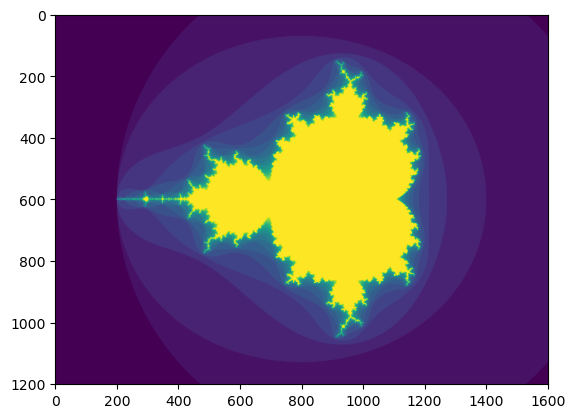

In [419]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot(h, w, maxit=20, r=2):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    x = np.linspace(-2.5, 1.5, 4*h+1)
    y = np.linspace(-1.5, 1.5, 3*w+1)
    A, B = np.meshgrid(x, y)
    C = A + B*1j
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > r                    
        div_now = diverge & (divtime == maxit)  
        divtime[div_now] = i                    
        z[diverge] = r                         

    return divtime
plt.clf()
plt.imshow(mandelbrot(400, 400))

用布尔值进行索引的第二种方式更类似于整数索引;对于数组的每个维度，我们给出一个一维布尔数组，选择我们想要的切片:

In [420]:
a = np.arange(12).reshape(3, 4)
b1 = np.array([False, True, True])         # 第一维度选择
b2 = np.array([True, False, True, False])  # 第二维度选择

a[b1, :]                                 

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [421]:
a[b1] 

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [422]:
a[:, b2]  

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [423]:
a[b1, b2] 

array([ 4, 10])

注意，一维布尔数组的长度必须与要切片的维度(或轴)的长度一致。在前面的例子中，b1的长度为3 (a中的行数)，而b2(长度为4)适用于索引a的第二个轴(列)。

### 3.3 ix_()函数<a id ='3-3'></a>
ix_函数可用于组合不同的向量，以获得每个n-uplet的结果。例如，如果你想计算从向量a, b和c中取的所有三联体的所有a+b*c:

In [424]:
a = np.array([2, 3, 4, 5])
b = np.array([8, 5, 4])
c = np.array([5, 4, 6, 8, 3])
ax, bx, cx = np.ix_(a, b, c)
ax

array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [425]:
bx

array([[[8],
        [5],
        [4]]])

In [426]:
cx

array([[[5, 4, 6, 8, 3]]])

In [427]:
ax.shape, bx.shape, cx.shape

((4, 1, 1), (1, 3, 1), (1, 1, 5))

In [428]:
result = ax + bx * cx
result

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])

In [429]:
result[3, 2, 4]

17

In [430]:
a[3] + b[2] * c[4]

17

## 4 技巧和提示<a id ='4'></a>


### 4.1 自动reshape<a id ='4-1'></a>
要改变一个数组的尺寸，你可以省略一个大小，然后它会自动推导:

In [431]:
a = np.arange(30)
b = a.reshape((2, -1, 3))  # -1就是省略的一个大小
b.shape

(2, 5, 3)

In [432]:
b

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

### 4.2 矢量叠加<a id ='4-2'></a>
我们如何从一列大小相等的行向量中构造一个二维数组?  
在MATLAB中这很简单:如果x和y是两个相同长度的向量，你只需要做m=[x;y]。在NumPy中，这是通过函数column_stack, dstack, hstack和vstack来工作的，这取决于要进行堆叠的维度。例如:

In [433]:
x = np.arange(0, 10, 2)
y = np.arange(5)
m = np.vstack([x, y])
m

array([[0, 2, 4, 6, 8],
       [0, 1, 2, 3, 4]])

In [434]:
xy = np.hstack([x, y])
xy

array([0, 2, 4, 6, 8, 0, 1, 2, 3, 4])

### 4.3 柱状图<a id ='4-3'></a>
应用于数组的NumPy直方图函数返回一对矢量:向数组的直方图和bin边的矢量。

注意:matplotlib还有一个构建直方图的函数(在Matlab中称为hist)，它与NumPy中的函数不同。主要的区别是pylab.hist自动绘制直方图，而numpy.histogram只生成数据。

(array([0.00128706, 0.00257412, 0.00257412, 0.00257412, 0.00772237,
        0.00900943, 0.01415767, 0.03861183, 0.04247301, 0.03989889,
        0.05663068, 0.08623308, 0.13900258, 0.16088261, 0.24454157,
        0.30117225, 0.34750645, 0.41700774, 0.51997261, 0.60234451,
        0.68214229, 0.69501289, 0.78768128, 0.73619884, 0.79540365,
        0.78896834, 0.72976354, 0.7014482 , 0.69501289, 0.60749275,
        0.57660329, 0.4478972 , 0.39126652, 0.28186634, 0.24196745,
        0.20592975, 0.13385434, 0.10425193, 0.07851072, 0.04762125,
        0.0296024 , 0.03217652, 0.01029649, 0.00900943, 0.0064353 ,
        0.00772237, 0.00514824, 0.00128706, 0.00257412, 0.00128706]),
 array([0.08106893, 0.15876533, 0.23646173, 0.31415813, 0.39185453,
        0.46955093, 0.54724733, 0.62494373, 0.70264013, 0.78033653,
        0.85803293, 0.93572933, 1.01342573, 1.09112213, 1.16881853,
        1.24651493, 1.32421133, 1.40190773, 1.47960413, 1.55730053,
        1.63499693, 1.71269333, 1.79038973, 1.

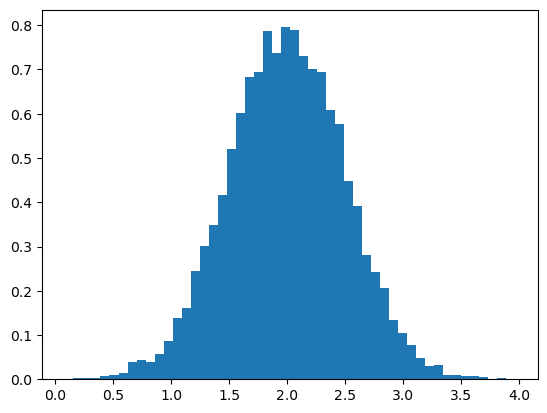

In [435]:
import numpy as np
rg = np.random.default_rng(1)
import matplotlib.pyplot as plt
# 建立一个10000法向偏差的向量，方差为0.5^2，均值为2
mu, sigma = 2, 0.5
v = rg.normal(mu, sigma, 10000)
# 绘制一个有50个长条的标准化直方图
plt.hist(v, bins=50, density=True)       


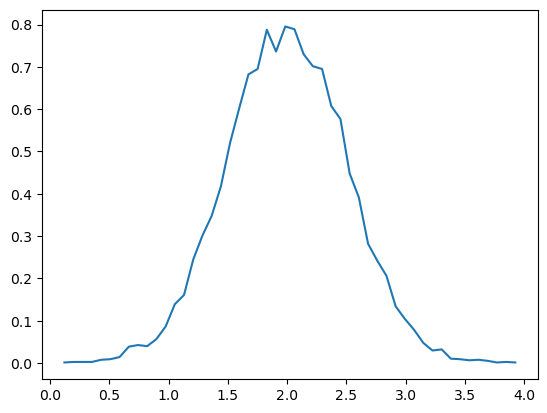

In [436]:
# 用numpy计算直方图，然后绘图
(n, bins) = np.histogram(v, bins=50, density=True)  
plt.plot(.5 * (bins[1:] + bins[:-1]), n) 

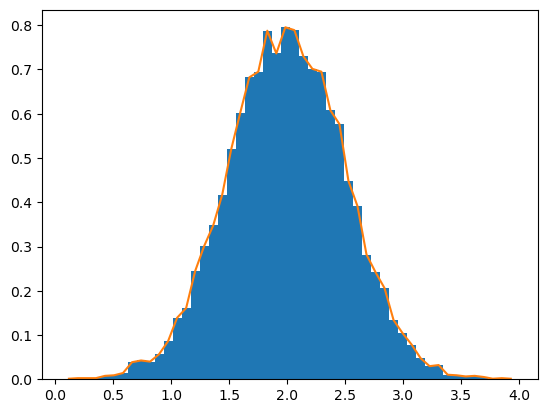

In [437]:
import numpy as np
rg = np.random.default_rng(1)
import matplotlib.pyplot as plt

mu, sigma = 2, 0.5
v = rg.normal(mu, sigma, 10000)

plt.hist(v, bins=50, density=True) 


(n, bins) = np.histogram(v, bins=50, density=True)
plt.plot(.5 * (bins[1:] + bins[:-1]), n) 

## 总结 <a id='summary'></a>

在本教程中，您学习了在 NumPy 中的一些基础方法。 

具体而言，您了解到： 

* 了解numpy中一维、二维和 n 维数组之间的区别;
* 了解如何将一些线性代数运算应用于 n 维数组，不使用 for 循环;
* 了解 n 维数组的轴和形状属性。

## 进一步阅读 <a id='furtherreading'></a>

如果您希望更深入学习 Numpy 及 Python 科学计算，本节提供有关该主题的更多资源。

- The [Python tutorial](https://docs.python.org/tutorial/)
- [NumPy Reference](https://numpy.org/doc/stable/reference/index.html#reference)
- [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html)
- [SciPy Lecture Notes](https://scipy-lectures.org/)
- A [matlab, R, IDL, NumPy/SciPy dictionary](http://mathesaurus.sf.net/)
- [tutorial-svd](https://numpy.org/numpy-tutorials/content/tutorial-svd.html)

## 参考

1. https://numpy.org/doc/stable/user/quickstart.html

<a href="https://bohrium.dp.tech/notebook/0ab674ad088c475e8b789eebfbd998b9" target="_blank"><img src="https://cdn.dp.tech/bohrium/web/static/images/open-in-bohrium.svg" alt="Open In Bohrium"/></a>